In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fake-job-recruitment/clean_data.csv
/kaggle/input/real-or-fake-fake-jobposting-prediction/fake_job_postings.csv


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
pd.set_option('display.max_columns', None)
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
from nltk.stem import WordNetLemmatizer
import string
import base64
import string
import re
from collections import Counter
from nltk.corpus import stopwords
stopwords = stopwords.words('english')
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.base import TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.feature_extraction.stop_words import ENGLISH_STOP_WORDS
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, confusion_matrix
from nltk.corpus import stopwords
import string 
import re
import spacy 
spacy.load('en_core_web_lg')
from spacy.lang.en import English
parser = English()

/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.feature_extraction.stop_words module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_extraction.text. Anything that cannot be imported from sklearn.feature_extraction.text is now part of the private API.
  warnings.warn(message, FutureWarning)


In [3]:
df = pd.read_csv('/kaggle/input/fake-job-recruitment/clean_data.csv')

In [4]:
del df['Unnamed: 0']

In [5]:
df1 = df.copy()

tokenize and vectorize text data for better processing

In [6]:
import spacy
nlp = spacy.load('en_core_web_lg')
stopwords = stopwords.words('english')
punctuations = string.punctuation

In [7]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
import spacy
nlp = spacy.load('en_core_web_lg')
from nltk.corpus import stopwords
stopwords = stopwords.words('english')

In [8]:
STOPLIST = set(stopwords + list(ENGLISH_STOP_WORDS))
SYMBOLS = " ".join(string.punctuation).split(" ")

In [9]:
def tokenizetext(sample):
    text = sample.strip().replace("\n", " ").replace("\r", " ")
    text = text.lower()
    tokens = parser(text)
    lemmas = []
    for tok in tokens:
        lemmas.append(tok.lemma_.lower().strip() if tok.lemma_ != "-PRON-" else tok.lower_)
    tokens = lemmas
    tokens = [tok for tok in tokens if tok not in STOPLIST]
    tokens = [tok for tok in tokens if tok not in SYMBOLS]
    return tokens

In [10]:
vectorizer = CountVectorizer(tokenizer = tokenizetext, ngram_range = (1,3), min_df = 0.06)

In [11]:
vectorizer_features = vectorizer.fit_transform(df1['description'])

In [12]:
vectorized_df = pd.DataFrame(vectorizer_features.todense(), columns = vectorizer.get_feature_names())
df_vectorized = pd.concat([df1, vectorized_df], axis = 1)

In [13]:
df_vectorized.drop('description', axis = 1, inplace = True)
df_vectorized.dropna(inplace=True)

create dummies

In [14]:
columns_to_1_hot = ['employment_type', 'required_experience', 'required_education', 'industry', 'function']
for column in columns_to_1_hot:
    encoded = pd.get_dummies(df_vectorized[column])
    df_vectorized = pd.concat([df_vectorized, encoded], axis = 1)

In [15]:
columns_to_1_hot += ['title', 'city', 'country_name']
df_vectorized.drop(columns_to_1_hot, axis = 1, inplace = True)

devide data into training and test set

In [16]:
target = df_vectorized['fraudulent']
features = df_vectorized.drop('fraudulent', axis = 1)
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.1, stratify = target, random_state=42)

In [17]:
Model_Score = []
Model_Name = []

# Models

In [18]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score

# Logistic Regression

In [19]:
log_reg = LogisticRegression()
c_values = [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]
penalty_options = ['l1', 'l2']
param_grid = dict(C = c_values, penalty = penalty_options)

In [20]:
grid_tfidf = GridSearchCV(log_reg, param_grid = param_grid, cv = 10, scoring = 'roc_auc', n_jobs = -1, verbose=1)

In [21]:
grid_tfidf.fit(X_train, y_train)

Fitting 10 folds for each of 20 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    4.3s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   34.5s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:   37.6s finished
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


GridSearchCV(cv=10, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100,
                               1000, 10000],
                         'penalty': ['l1', 'l2']},
             scoring='roc_auc', verbose=1)

In [22]:
log_reg_pred = grid_tfidf.predict(X_test)

In [23]:
roc_auc_score(y_test, log_reg_pred)

0.7795466908431551

In [24]:
Model_Name.append('Logistic_Regression')
Model_Score.append(round(roc_auc_score(y_test, log_reg_pred), 4))

# KNN

In [25]:
knn = KNeighborsClassifier()
k_range = list(np.arange(2, 23, 2))
param_grid_knn = dict(n_neighbors = k_range)

In [26]:
grid_knn = GridSearchCV(knn, param_grid_knn, cv = 10, scoring = 'roc_auc', n_jobs = -1, verbose = 1)

In [27]:
grid_knn.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 10 folds for each of 11 candidates, totalling 110 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 110 out of 110 | elapsed:  9.8min finished


GridSearchCV(cv=10, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': [2, 4, 6, 8, 10, 12, 14, 16, 18, 20,
                                         22]},
             scoring='roc_auc', verbose=1)

In [28]:
knn_pred = grid_knn.predict(X_test)

In [29]:
Model_Name.append('KNN')
Model_Score.append(round(roc_auc_score(y_test, knn_pred), 4))

# SVC

In [30]:
svc = SVC()
kernel = ['linear', 'rbf']
param_grid_knn = dict(kernel = kernel)

In [31]:
grid_svc = GridSearchCV(svc, param_grid_knn, cv = 10, scoring = 'roc_auc', n_jobs = -1, verbose = 2)

In [32]:
grid_svc.fit(X_train, y_train)

Fitting 10 folds for each of 2 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:   54.9s finished


GridSearchCV(cv=10, estimator=SVC(), n_jobs=-1,
             param_grid={'kernel': ['linear', 'rbf']}, scoring='roc_auc',
             verbose=2)

In [33]:
svc_pred = grid_svc.predict(X_test)

In [34]:
Model_Name.append('SVC')
Model_Score.append(round(roc_auc_score(y_test, svc_pred), 4))

# Random Forest Classifier

In [35]:
rf = RandomForestClassifier()
n_estimators_range = [1, 2, 4, 8, 16, 32, 64, 100, 200]
param_grid_rf = dict(n_estimators = n_estimators_range)
grid_rf = GridSearchCV(rf, param_grid_rf, cv = 10, scoring = 'roc_auc', n_jobs = -1, verbose = 1)

In [36]:
grid_rf.fit(X_train, y_train)

Fitting 10 folds for each of 9 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    3.7s
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:   54.0s finished


GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'n_estimators': [1, 2, 4, 8, 16, 32, 64, 100, 200]},
             scoring='roc_auc', verbose=1)

In [37]:
rf_pred = grid_rf.predict(X_test)

In [38]:
Model_Name.append('Random_Forest')
Model_Score.append(round(roc_auc_score(y_test, rf_pred), 4))

# Multi Layer Perceptron

In [39]:
mlp = MLPClassifier(solver = 'sgd', activation = 'relu', hidden_layer_sizes = (100, 50, 30), max_iter = 1000)

In [40]:
mlp.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(100, 50, 30), max_iter=1000, solver='sgd')

In [41]:
mlp_pred = mlp.predict(X_test)

In [42]:
Model_Name.append('MLP-NN (sgd)')
Model_Score.append(round(roc_auc_score(y_test, mlp_pred), 4))

In [43]:
mlp = MLPClassifier(solver = 'adam', activation = 'relu', hidden_layer_sizes = (100, 50, 30), max_iter = 1000)

In [44]:
mlp.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(100, 50, 30), max_iter=1000)

In [45]:
mlp_pred = mlp.predict(X_test)

In [46]:
Model_Name.append('MLP-NN (adam)')
Model_Score.append(round(roc_auc_score(y_test, mlp_pred), 4))

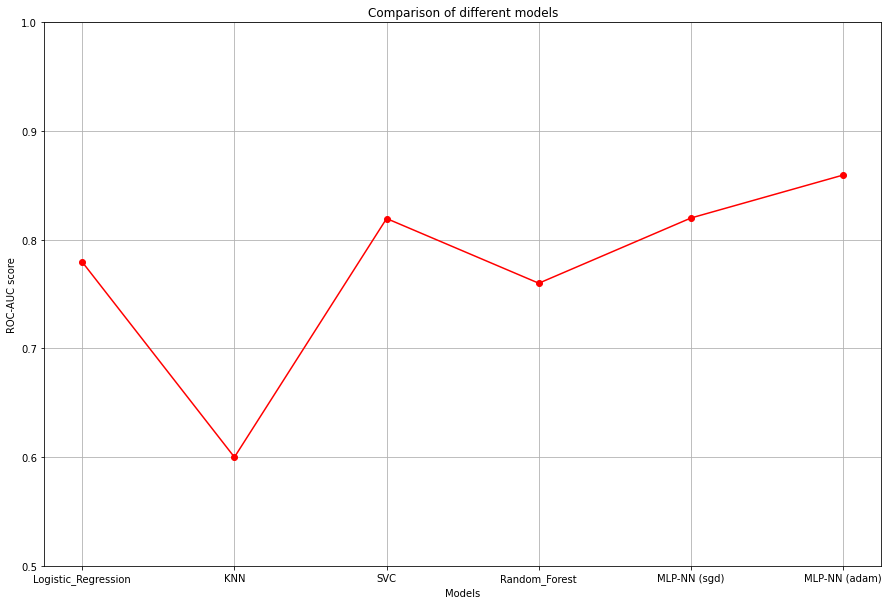

In [47]:
plt.figure(figsize = (15, 10))
plt.plot(Model_Name,Model_Score, marker = 'o', color = 'red')
plt.title('Comparison of different models')
plt.xlabel('Models')
plt.ylabel('ROC-AUC score')
plt.ylim(0.5, 1.0)
plt.grid()
plt.savefig('Model_compare.jpeg')
plt.show()